In [ ]:
!pip install pysolar

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import matplotlib.pyplot as plt
from datetime import datetime,timedelta,timezone
from pysolar import radiation,solar
import numpy as np
import pandas as pd
from itertools import product
import pysolar

In [ ]:
#    
max_lat = 39.683213
min_lat = 39.677375
max_long = 46.585572
min_long = 46.583991

In [ ]:
lat_range = np.arange(min_lat,max_lat,0.001,dtype=float)
long_range = np.arange(min_long,max_long,0.001,dtype=float)
timezone = timezone(timedelta(hours=4)) #gmt+4
start = datetime(2021,9,1,tzinfo=timezone)  # 1 Jan 2022

In [ ]:
nhr = 24*30*12
dates = []
for ihr in range(nhr):
    date = start + timedelta(hours=ihr)
    dates.append(date)

In [ ]:
lat_long_data = pd.DataFrame(list(product(lat_range, long_range,dates)), columns=['lat', 'long',"time"])

In [ ]:
 #Calculate radiation every hour for 30 days
dates, altitudes_deg, radiations = list(), list(), list()
for i in lat_range:
    for j in long_range:
        for ihr in range(nhr):
            date = start + timedelta(hours=ihr)
            altitude_deg = pysolar.solar.get_altitude(i,j,date)
            if altitude_deg <= 0:
                radiation = 0.
            else:
                radiation = pysolar.radiation.get_radiation_direct(date,altitude_deg)
            dates.append(date)
            altitudes_deg.append(altitude_deg)
            radiations.append(radiation)   

/usr/local/lib/python3.7/dist-packages/pysolar/solartime.py:115: UserWarning: I don't know about leap seconds after 2021
  (leap_seconds_base_year + len(leap_seconds_adjustments) - 1)


In [ ]:
lat_long_data["radiation"] = radiations
lat_long_data["altitudes_deg"] = altitudes_deg 

In [ ]:
lat_long_data

,lat,long,time,radiation,altitudes_deg
0,39.677375,46.583991,2021-09-01 00:00:00+04:00,0.000000,-40.401284
1,39.677375,46.583991,2021-09-01 01:00:00+04:00,0.000000,-41.981667
2,39.677375,46.583991,2021-09-01 02:00:00+04:00,0.000000,-39.624216
3,39.677375,46.583991,2021-09-01 03:00:00+04:00,0.000000,-33.837383
4,39.677375,46.583991,2021-09-01 04:00:00+04:00,0.000000,-25.574240
...,...,...,...,...,...
103675,39.682375,46.584991,2022-08-26 19:00:00+04:00,157.174462,5.806881
103676,39.682375,46.584991,2022-08-26 20:00:00+04:00,0.000000,-5.565042
103677,39.682375,46.584991,2022-08-26 21:00:00+04:00,0.000000,-16.157252
103678,39.682375,46.584991,2022-08-26 22:00:00+04:00,0.000000,-25.650315


In [ ]:
lat_long_data_labels = pd.DataFrame(list(product(lat_range, long_range)), columns=['lat', 'long']).reset_index()

In [ ]:
lat_long_data_labels

,index,lat,long
0,0,39.677375,46.583991
1,1,39.677375,46.584991
2,2,39.678375,46.583991
3,3,39.678375,46.584991
4,4,39.679375,46.583991
5,5,39.679375,46.584991
6,6,39.680375,46.583991
7,7,39.680375,46.584991
8,8,39.681375,46.583991
9,9,39.681375,46.584991


In [ ]:
district_final = pd.merge(lat_long_data,lat_long_data_labels, on=('lat',"long"))

In [ ]:
district_final[district_final["index"]==1]

,lat,long,time,radiation,altitudes_deg,index
8640,39.677375,46.584991,2021-09-01 00:00:00+04:00,0.000000,-40.401516,1
8641,39.677375,46.584991,2021-09-01 01:00:00+04:00,0.000000,-41.981639,1
8642,39.677375,46.584991,2021-09-01 02:00:00+04:00,0.000000,-39.623934,1
8643,39.677375,46.584991,2021-09-01 03:00:00+04:00,0.000000,-33.836903,1
8644,39.677375,46.584991,2021-09-01 04:00:00+04:00,0.000000,-25.573627,1
...,...,...,...,...,...,...
17275,39.677375,46.584991,2022-08-26 19:00:00+04:00,157.135471,5.806143,1
17276,39.677375,46.584991,2022-08-26 20:00:00+04:00,0.000000,-5.566609,1
17277,39.677375,46.584991,2022-08-26 21:00:00+04:00,0.000000,-16.159656,1
17278,39.677375,46.584991,2022-08-26 22:00:00+04:00,0.000000,-25.653587,1


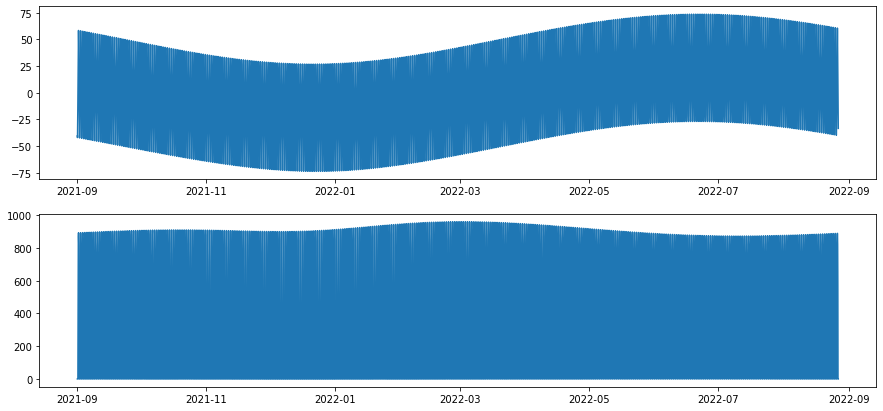

In [ ]:
fig,axes = plt.subplots(nrows=2,figsize=(15,7))
axes[0].plot(district_final[district_final["index"]==10]["time"],district_final[district_final["index"]==10]["altitudes_deg"])
axes[1].plot(district_final[district_final["index"]==10]["time"],district_final[district_final["index"]==10]["radiation"])

In [ ]:
district_final.shape

(103680, 6)

In [ ]:
district_final.to_csv("saribaba.csv", index=False)